In [1]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# 1. Load pre-trained model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# 2. Prepare input
text = "Hello, my name is"
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 3. Generate text (optional, to verify the model is working)
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=50, num_return_sequences=1)

print("Generated text:")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

C:\Users\vaibh\anaconda3\envs\pytorch\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vaibh\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your i

Generated text:
Hello, my name is John. I'm a writer, and I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm


In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.profiler import profile, record_function, ProfilerActivity

# 1. Load pre-trained model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# 2. Prepare input
text = "Hello, my name is"
inputs = tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 3. Profile the model execution
with profile(
    activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
    record_shapes=True,
    with_stack=True,
    profile_memory=True
) as prof:
    with record_function("model_inference"):
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# 4. Save the trace file
prof.export_chrome_trace("gpt2_trace.json")

print("Trace file 'gpt2_trace.json' has been generated.")

Trace file 'gpt2_trace.json' has been generated.


In [21]:
from hta.trace_analysis import TraceAnalysis

# 1. Set the path to the directory containing your trace file
trace_dir = "Downloads/pytorch/"  # Replace with the actual path

# 2. Initialize the analyzer
analyzer = TraceAnalysis(trace_dir=trace_dir)

# 3. Temporal breakdown: compute vs memory vs idle
temporal_df = analyzer.get_temporal_breakdown(visualize=True)

# 4. Idle time breakdown
idle_df = analyzer.get_idle_time_breakdown(visualize=True)

# 5. Kernel duration distribution
kernel_df = analyzer.get_kernel_duration_distribution(visualize=True)

# 6. Communication-computation overlap (useful for multi-GPU)
overlap_df = analyzer.get_communication_computation_overlap(visualize=True)

# 7. Save results to CSV (optional)
temporal_df.to_csv("temporal_breakdown.csv")
idle_df.to_csv("idle_time_breakdown.csv")
kernel_df.to_csv("kernel_duration_distribution.csv")

Downloads/pytorch/ is not a valid path
There is no item in the rank to trace file map.
The list of ranks to be parsed is empty.
leaving parse_traces duration=0.00 seconds


ValueError: min() iterable argument is empty

In [9]:
./traces/gpt2_run/gpt2_trace.json

SyntaxError: invalid syntax (1435989176.py, line 1)

In [10]:
import pynvml
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import time

# Initialize GPU power monitoring
pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)

# Load model
device = torch.device("cuda")
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Prepare input
input_text = "translate English to French: Hello, how are you?"
inputs = tokenizer(input_text, return_tensors="pt").to(device)

# Warm-up
_ = model.generate(**inputs)

# Measure power during generation
powers = []
start = time.time()

for _ in range(20):  # Sample power 20 times (~10s if 0.5s interval)
    power = pynvml.nvmlDeviceGetPowerUsage(handle)  # in mW
    powers.append(power)
    time.sleep(0.5)

# Run inference
output_ids = model.generate(**inputs, max_new_tokens=20)
end = time.time()

# Decode output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("📝 Input:", input_text)
print("📤 Output:", output_text)

# Compute power
avg_power = sum(powers) / len(powers) / 1000  # to watts
duration = end - start
energy_joules = avg_power * duration

print(f"⚡ Avg Power: {avg_power:.2f} W")
print(f"⏱ Duration: {duration:.2f} s")
print(f"🔋 Estimated Energy: {energy_joules:.2f} J")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\vaibh\anaconda3\envs\pytorch\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vaibh\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [11]:
!pip install nvidia-ml-py3

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19217 sha256=2cc820dbbdcd64bf4319ba076645ca65dc4116f3426b29c5043b407e6a061d16
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\6e\65\79\33dee66cba26e8204801916dfee7481bccfd22905ebb841fe5
Successfully built nvidia-ml-py3


  DEPRECATION: Building 'nvidia-ml-py3' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'nvidia-ml-py3'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [14]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.6 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 1.8 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.8 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   ------------ ---

In [16]:
import threading
import time
import pynvml
import torch
import pandas as pd
import matplotlib.pyplot as plt

class PowerMonitor:
    """
    A class to monitor GPU power consumption in a background thread.
    """
    def __init__(self, sample_interval=1.0):
        self.sample_interval = sample_interval
        self._monitoring = False
        self.power_readings = []
        self.thread = None

        try:
            pynvml.nvmlInit()
            # Assuming you want to monitor the first GPU (device 0)
            self.handle = pynvml.nvmlDeviceGetHandleByIndex(0)
            print("Successfully initialized NVML and got handle for GPU 0.")
        except pynvml.NVMLError as error:
            print(f"Failed to initialize NVML: {error}")
            self.handle = None

    def _monitor_power(self):
        """The actual monitoring loop that runs in the background."""
        while self._monitoring:
            try:
                # Get power usage in milliwatts and convert to watts
                power_mw = pynvml.nvmlDeviceGetPowerUsage(self.handle)
                power_w = power_mw / 1000.0
                self.power_readings.append(power_w)
            except pynvml.NVMLError as error:
                print(f"Error getting power reading: {error}")
            time.sleep(self.sample_interval)

    def start(self):
        """Starts the power monitoring thread."""
        if self.handle and not self._monitoring:
            self._monitoring = True
            self.power_readings = []  # Clear previous readings
            self.thread = threading.Thread(target=self._monitor_power)
            self.thread.start()
            print("Power monitor started.")

    def stop(self):
        """Stops the power monitoring thread."""
        if self._monitoring:
            self._monitoring = False
            if self.thread:
                self.thread.join()
            print("Power monitor stopped.")
        pynvml.nvmlShutdown() # Clean up NVML
        return self.power_readings

    def get_summary(self):
        """Returns a summary of the power consumption readings."""
        if not self.power_readings:
            return {
                'average_power_w': 0,
                'max_power_w': 0,
                'min_power_w': 0,
                'total_energy_joules': 0
            }

        avg_power = sum(self.power_readings) / len(self.power_readings)
        max_power = max(self.power_readings)
        min_power = min(self.power_readings)
        # Energy (Joules) = Average Power (Watts) * Time (seconds)
        total_time = len(self.power_readings) * self.sample_interval
        total_energy = avg_power * total_time

        return {
            'average_power_w': avg_power,
            'max_power_w': max_power,
            'min_power_w': min_power,
            'total_energy_joules': total_energy,
            'monitoring_duration_s': total_time
        }
        
    def plot(self):
        """Plots the power consumption over time."""
        if not self.power_readings:
            print("No power readings to plot.")
            return

        time_axis = [i * self.sample_interval for i in range(len(self.power_readings))]
        
        plt.figure(figsize=(12, 6))
        plt.plot(time_axis, self.power_readings, marker='o', linestyle='-', label='GPU Power')
        plt.title('GPU Power Consumption Over Time')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Power (Watts)')
        plt.grid(True)
        plt.legend()
        plt.show()

Successfully initialized NVML and got handle for GPU 0.
Power monitor started.

Starting a sample GPU workload...
Running workload on NVIDIA GeForce RTX 3050 Laptop GPU
GPU workload finished.
Power monitor stopped.

--- Power Consumption Summary ---
Average Power: 27.63 Watts
Max Power:     30.18 Watts
Min Power:     4.97 Watts
Total Energy:  386.85 Joules over 14.0 seconds
---------------------------------



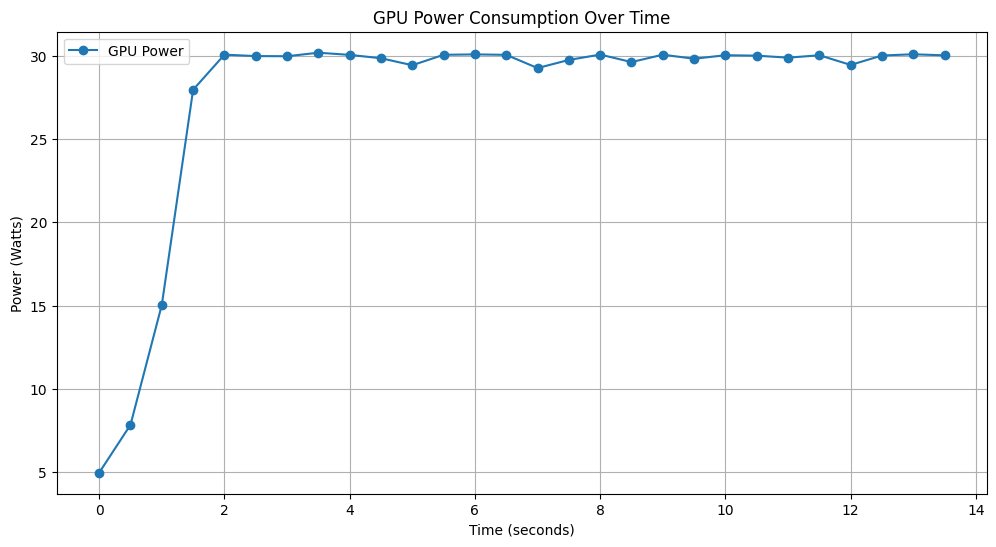

In [17]:
# --- 1. Instantiate the monitor ---
# It will sample power every 0.5 seconds
power_monitor = PowerMonitor(sample_interval=0.5)

# --- 2. Start monitoring ---
power_monitor.start()

# --- 3. Run your GPU-intensive workload ---
print("\nStarting a sample GPU workload...")
# Ensure the device is a CUDA device if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if str(device) == "cpu":
    print("WARNING: No CUDA GPU found. Running on CPU. Power consumption will be from the GPU at idle.")
else:
    print(f"Running workload on {torch.cuda.get_device_name(0)}")

# A simple matrix multiplication task to load the GPU
a = torch.randn(10000, 10000, device=device)
b = torch.randn(10000, 10000, device=device)

for i in range(15):
    c = torch.matmul(a, b)
    # Synchronize to make sure the operation is complete before the next loop
    if torch.cuda.is_available():
      torch.cuda.synchronize()
    time.sleep(0.1) # A small pause

print("GPU workload finished.")

# --- 4. Stop monitoring and get readings ---
readings = power_monitor.stop()

# --- 5. Print summary and plot ---
summary = power_monitor.get_summary()

print("\n--- Power Consumption Summary ---")
print(f"Average Power: {summary['average_power_w']:.2f} Watts")
print(f"Max Power:     {summary['max_power_w']:.2f} Watts")
print(f"Min Power:     {summary['min_power_w']:.2f} Watts")
print(f"Total Energy:  {summary['total_energy_joules']:.2f} Joules over {summary['monitoring_duration_s']:.1f} seconds")
print("---------------------------------\n")

# Plot the collected data
power_monitor.plot()